Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Time taken:  1.0209977626800537
{'scores': tensor([0.9777, 0.9979, 0.9309, 0.9995, 0.9609, 0.9044, 0.9353, 0.9689, 0.9821,
        0.9684, 0.9573], device='cuda:0', grad_fn=<IndexBackward0>), 'labels': tensor([2, 1, 1, 3, 1, 1, 1, 1, 1, 2, 2], device='cuda:0'), 'boxes': tensor([[ 892.2146,  206.9113,  988.7476,  299.6856],
        [1024.0195,  155.3322, 1104.6425,  311.7899],
        [ 539.8929,  178.9231,  560.2993,  223.5952],
        [   1.1531,  207.8622,  416.7769,  370.9080],
        [ 763.7101,  189.5276,  805.9526,  268.2773],
        [ 538.4155,  179.7436,  558.4648,  223.6529],
        [ 675.1573,  180.3770,  696.0836,  224.5504],
        [ 673.5991,  180.8210,  694.9794,  225.1277],
        [ 926.8411,  181.7517,  973.2616,  247.4831],
        [ 823.6599,  245.2167,  956.0778,  366.2228],
        [ 378.0818,  210.3904,  429.5189,  259.9577]], device='cuda:0',
       grad_fn=<IndexBackward0>)}


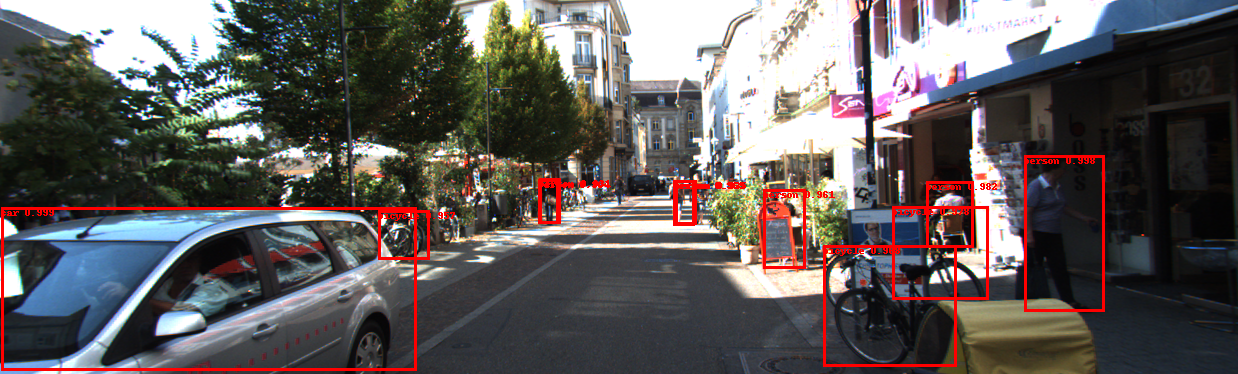

Detected bicycle with confidence 0.978 at location [892.21, 206.91, 988.75, 299.69]
Detected person with confidence 0.998 at location [1024.02, 155.33, 1104.64, 311.79]
Detected person with confidence 0.931 at location [539.89, 178.92, 560.3, 223.6]
Detected car with confidence 0.999 at location [1.15, 207.86, 416.78, 370.91]
Detected person with confidence 0.961 at location [763.71, 189.53, 805.95, 268.28]
Detected person with confidence 0.904 at location [538.42, 179.74, 558.46, 223.65]
Detected person with confidence 0.935 at location [675.16, 180.38, 696.08, 224.55]
Detected person with confidence 0.969 at location [673.6, 180.82, 694.98, 225.13]
Detected person with confidence 0.982 at location [926.84, 181.75, 973.26, 247.48]
Detected bicycle with confidence 0.968 at location [823.66, 245.22, 956.08, 366.22]
Detected bicycle with confidence 0.957 at location [378.08, 210.39, 429.52, 259.96]


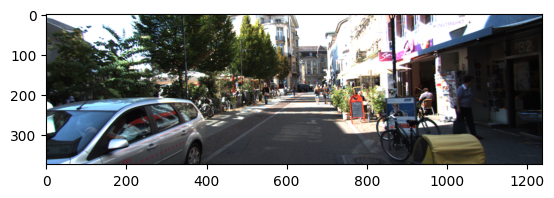

In [28]:
from transformers import AutoImageProcessor, AutoModelForObjectDetection
import torch
from PIL import Image, ImageDraw
import requests
from IPython.display import display
import time

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)

image=Image.open("Kitti/data_object_image_2/training/image_2/000015.png")


image_processor = AutoImageProcessor.from_pretrained("hustvl/yolos-small")
model = AutoModelForObjectDetection.from_pretrained("hustvl/yolos-small")

inputs = image_processor(images=image, return_tensors="pt")
model.to('cuda')
inputs.to('cuda')
inference_start=time.time()
outputs = model(**inputs)
inference_end=time.time()
print("Time taken: ",inference_end-inference_start)
# Convert outputs (bounding boxes and class logits) to COCO API
target_sizes = torch.tensor([image.size[::-1]])
# image_width = image.shape[0]
# image_height = image.shape[1]
# target_sizes = torch.tensor([[3,image_height, image_width]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]

import matplotlib.pyplot as plt
plt.imshow(image)
# print(outputs)
print(results)



# Draw bounding boxes on the image
draw = ImageDraw.Draw(image)
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    label_str = model.config.id2label[label.item()]
    draw.rectangle(box, outline="red", width=3)
    draw.text((box[0], box[1]), f"{label_str} {round(score.item(), 3)}", fill="red")

# Display the image with bounding boxes in the notebook
display(image)
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

In [29]:
import pdb
from transformers import AutoImageProcessor, AutoModelForObjectDetection
import torch
from PIL import Image, ImageDraw
import requests
from IPython.display import display
import time


In [21]:
f = open("Kitti/data_object_label_2/training/label_2/000015.txt")
image=Image.open("Kitti/data_object_image_2/training/image_2/000015.png")
b={}
for lines in f:
    line=lines.split()
    b["boxes"]=line[4:8]
    print( b["boxes"])

['0.00', '194.70', '414.71', '373.00']
['1021.76', '133.28', '1101.39', '316.63']
['672.23', '171.73', '690.13', '224.33']
['692.68', '169.14', '712.48', '224.03']
['537.84', '168.08', '560.90', '224.34']
['916.14', '175.59', '973.32', '253.55']
['628.80', '173.19', '653.95', '196.66']
['610.47', '175.76', '625.72', '205.87']
['766.54', '168.32', '841.38', '261.86']
['464.22', '177.67', '508.93', '230.69']


In [22]:
print( b["boxes"])

['464.22', '177.67', '508.93', '230.69']


In [25]:
# for score, label, box in zip(b["scores"], b["labels"], b["boxes"]):
draw = ImageDraw.Draw(image)
# f = open("000015.txt")
f = open("Kitti/data_object_label_2/training/label_2/000015.txt")

truth=[]
for lines in f:
    line=lines.split()
    label=line[0]
    box=line[4:8]
    print(box)
    box = [round(float(i), 2) for i in box]
    truth.append(box)
    label_str =line[0]
    draw.rectangle(box, outline="red", width=3)
    draw.text((box[0], box[1]), f"{label_str}", fill="red")

['0.00', '194.70', '414.71', '373.00']
['1021.76', '133.28', '1101.39', '316.63']
['672.23', '171.73', '690.13', '224.33']
['692.68', '169.14', '712.48', '224.03']
['537.84', '168.08', '560.90', '224.34']
['916.14', '175.59', '973.32', '253.55']
['628.80', '173.19', '653.95', '196.66']
['610.47', '175.76', '625.72', '205.87']
['766.54', '168.32', '841.38', '261.86']
['464.22', '177.67', '508.93', '230.69']


[0.0, 194.7, 414.71, 373.0]

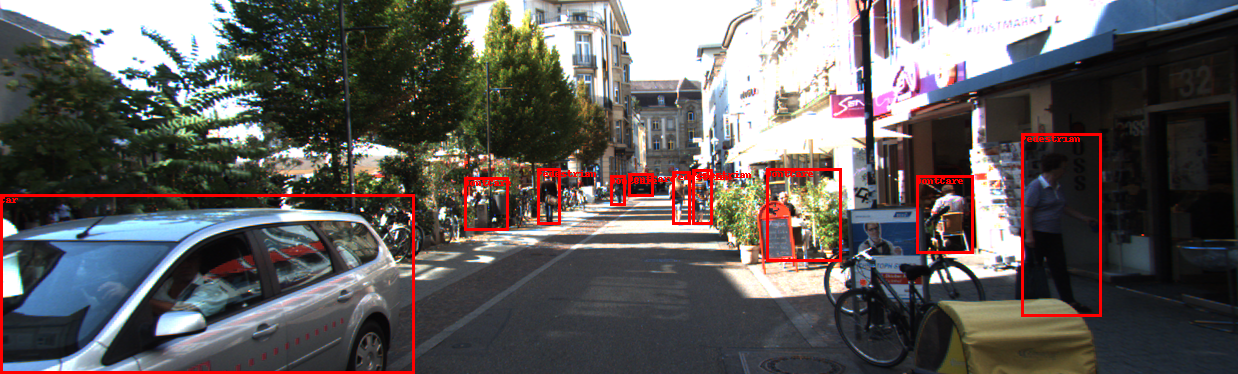

In [26]:
display(image)

In [38]:
def calculate_iou(box1, box2):
    # Calculate IoU between two bounding boxes
    
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2

    x_overlap = max(0, min(x1_max, x2_max) - max(x1_min, x2_min))
    y_overlap = max(0, min(y1_max, y2_max) - max(y1_min, y2_min))
    intersection_area = x_overlap * y_overlap
    union_area = (x1_max - x1_min) * (y1_max - y1_min) + (x2_max - x2_min) * (y2_max - y2_min) - intersection_area
    iou = intersection_area / union_area if union_area > 0 else 0.0

    return iou

def calculate_ap(precision, recall):
    # Calculate Average Precision (AP) using precision-recall curve
    m_precision = [0] + precision + [0]
    m_recall = [0] + recall + [1]

    for i in range(len(m_precision) - 1, 0, -1):
        m_precision[i - 1] = max(m_precision[i - 1], m_precision[i])

    ap = 0
    for i in range(len(m_recall) - 1):
        ap += (m_recall[i + 1] - m_recall[i]) * m_precision[i + 1]

    return ap

def calculate_map(ground_truth_boxes, predicted_boxes, iou_threshold=0.5):
    # Calculate Mean Average Precision (mAP) for object detection

    average_precisions = []
    for label in range(len(ground_truth_boxes)):
        gt_boxes = ground_truth_boxes[label]
        pred_boxes = predicted_boxes[label]

        # gt_boxes.sort(key=lambda x: x[0], reverse=True)
        # pred_boxes.sort(key=lambda x: x[0], reverse=True)

        num_gt = len(gt_boxes)
        num_pred = len(pred_boxes)

        tp = [0] * num_pred
        fp = [0] * num_pred

        for i, pred_box in enumerate(pred_boxes):
            max_iou = 0
            max_idx = -1

            for j, gt_box in enumerate(gt_boxes):
                iou = calculate_iou(pred_boxes, gt_boxes)
                if iou > max_iou:
                    max_iou = iou
                    max_idx = j

            if max_iou >= iou_threshold and not gt_boxes[max_idx][0]:
                tp[i] = 1
                gt_boxes[max_idx][0] = 1
            else:
                fp[i] = 1

        true_positives = sum(tp)
        false_positives = sum(fp)

        if num_gt > 0:
            precision = [tp / (tp + fp) if tp + fp > 0 else 0 for tp, fp in zip(tp, fp)]
            recall = [tp / num_gt for tp in tp]
            ap = calculate_ap(precision, recall)
        else:
            ap = 0

        average_precisions.append(ap)

    mAP = sum(average_precisions) / len(average_precisions)

    return mAP

# Example usage
ground_truth_boxes = {
    "label1": [[0, 10, 20, 30, 40], [0, 50, 60, 70, 80]],  # [0, xmin, ymin, xmax, ymax]
    "label2": [[0, 15, 25, 35, 45]]
}

predicted_boxes = {
    "label1": [[0.9, 12, 22, 32, 42]],
    "label2": [[0.8, 17, 27, 37, 47]]
}

iou_threshold = 0.5
# mAP = calculate_map(ground_truth_boxes, predicted_boxes, iou_threshold)
mAP= calculate_map(truth,results['boxes'],iou_threshold)
print("mAP:", mAP)

TypeError: 'float' object is not subscriptable

In [39]:
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

# Load ground truth annotations (GT) and predicted results (results) in COCO format
# coco_gt = COCO("path_to_ground_truth_annotations.json")
# coco_results = coco_gt.loadRes("path_to_predicted_results.json")

# Create COCOeval object
coco_eval = COCOeval(truth, results['boxes'], iouType="bbox")

# Run evaluation
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

AttributeError: 'list' object has no attribute 'getImgIds'